In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('Customer_Segmentation.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='str')

In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   str    
 3   Marital_Status       2240 non-null   str    
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   str    
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64  
 16 

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [12]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
# I converted Dt_customer to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)

In [14]:
df["Age"] = 2026 - df["Year_Birth"]

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,42
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,45


In [16]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [17]:
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

In [18]:
df["Total_Spending"] = df[spend_cols].sum(axis = 1)

In [19]:
# How much each row spent
df[["Total_Spending"]]

,Total_Spending
0,1529
1,21
2,734
3,48
4,407
...,...
2235,1094
2236,436
2237,1217
2238,782


In [20]:
df["Customer_Since"] =  (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [21]:
df[["Customer_Since"]]

,Customer_Since
0,4912
1,4362
2,4561
3,4388
4,4410
...,...
2235,4630
2236,4268
2237,4404
2238,4405


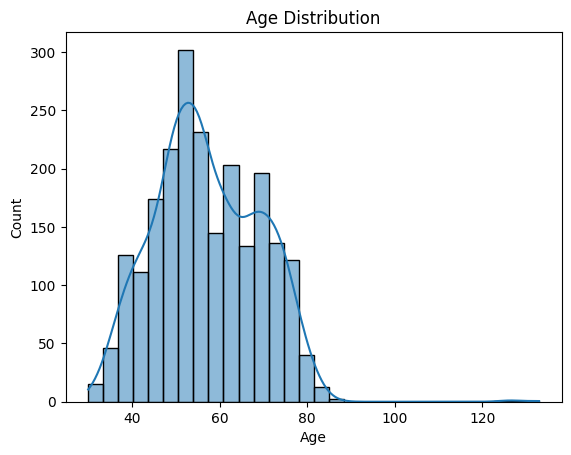

In [22]:
sns.histplot(df["Age"],bins = 30, kde = True)
plt.title("Age Distribution")
plt.show()

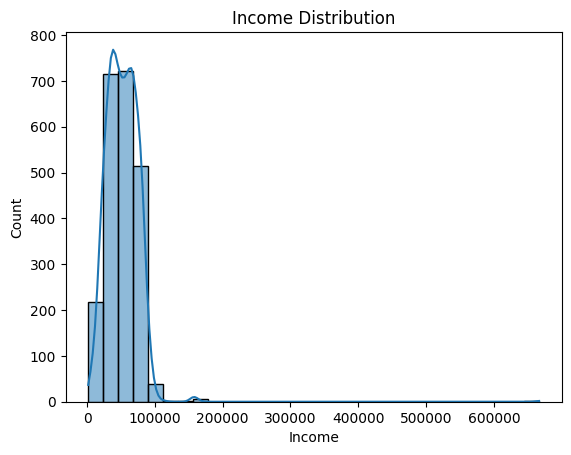

In [23]:
sns.histplot(df["Income"],bins = 30, kde = True)
plt.title("Income Distribution")
plt.show()

 
 

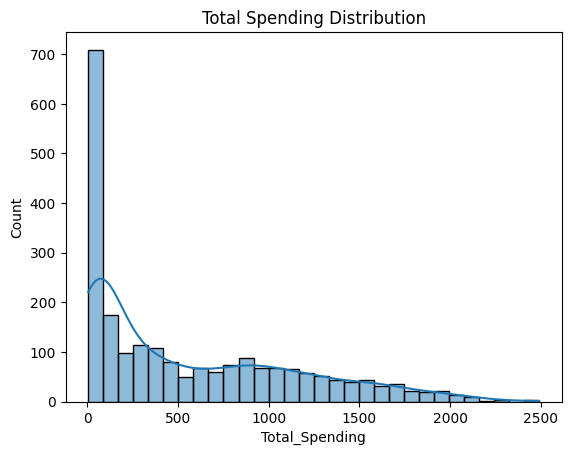

In [24]:
sns.histplot(df["Total_Spending"],bins = 30, kde = True)
plt.title("Total Spending Distribution")
plt.show()

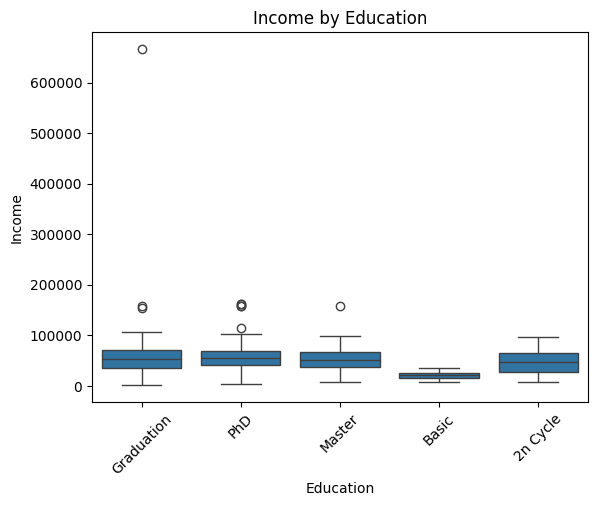

In [25]:
sns.boxplot(x = "Education", y = "Income", data = df)
plt.xticks(rotation = 45) 
plt.title("Income by Education")
plt.show()

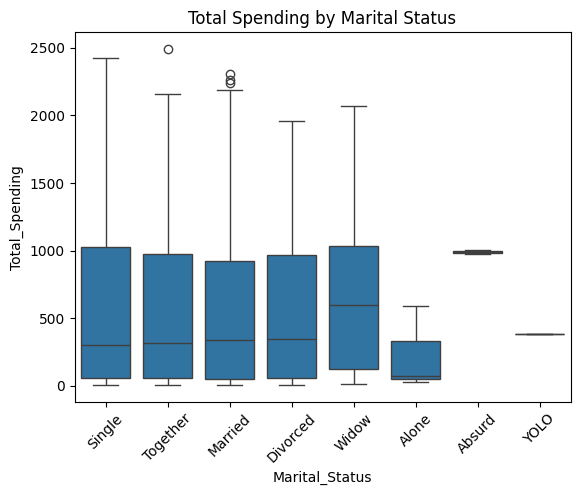

In [26]:
sns.boxplot(x = "Marital_Status", y = "Total_Spending", data = df)
plt.xticks(rotation = 45)
plt.title("Total Spending by Marital Status")
plt.show()

In [27]:
corr = df[["Income", "Age", "Total_Spending", "NumWebPurchases", "NumStorePurchases"]].corr()

In [28]:
corr

,Income,Age,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,0.668062,0.387878,0.529362
Age,0.161791,1.000000,0.112779,0.153051,0.127891
Total_Spending,0.668062,0.112779,1.000000,0.515999,0.670327
NumWebPurchases,0.387878,0.153051,0.515999,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,0.670327,0.516240,1.000000


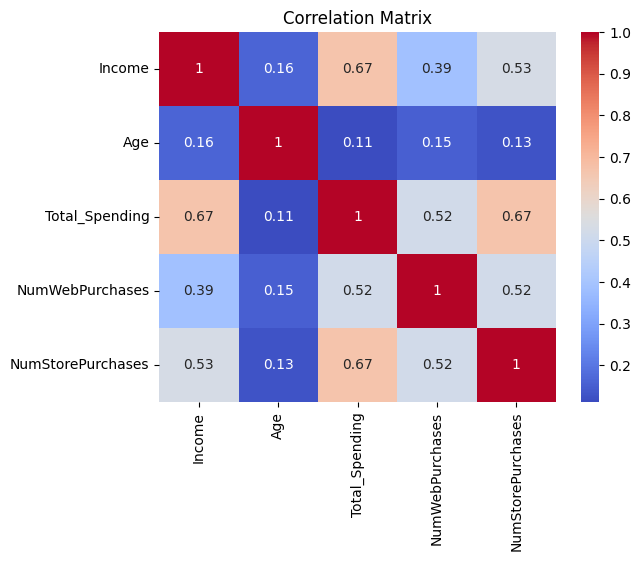

In [29]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show() 

In [30]:
pivot_income = df.pivot_table(values = "Income", index = "Education", columns = "Marital_Status", aggfunc = "mean" )

In [31]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


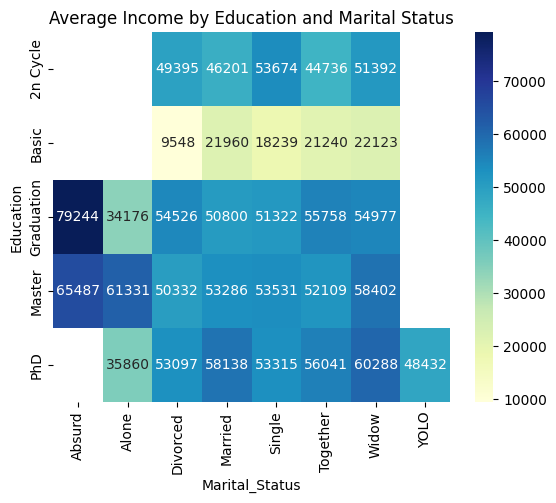

In [32]:
sns.heatmap(pivot_income, annot = True, fmt = ".0f", cmap = "YlGnBu")
plt.title("Average Income by Education and Marital Status")
plt.show()

In [33]:
group1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending = False)


In [34]:
group1

Education
PhD           644.330561
Graduation    571.002688
Master        569.578082
2n Cycle      448.050000
Basic          58.962963
Name: Total_Spending, dtype: float64

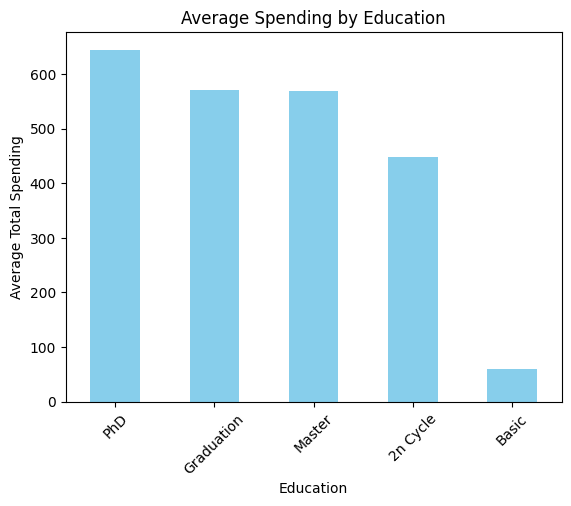

In [35]:
group1.plot(kind="bar", color = "skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation= 45)
plt.show()

In [36]:
df["AcceptedAny"] = df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis =1)

In [37]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [38]:
df["AcceptedAny"]  = df["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0)

In [39]:
df["AcceptedAny"].unique()

array([1, 0])

In [40]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending = False)

In [41]:
#Proportion of Acceptances
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

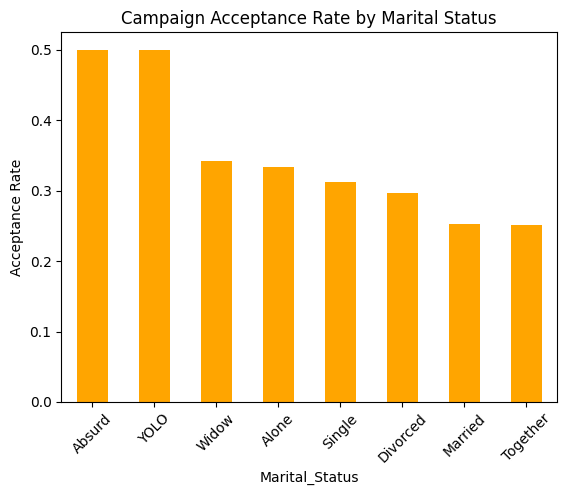

In [42]:
group2.plot(kind = "bar", color = "orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation = 45)
plt.show()

In [43]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [44]:
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

In [45]:
df["AgeGroup"] = pd.cut(df["Age"], bins = bins, labels = labels)

In [46]:
df[["AgeGroup","Age"]].head(15)

,AgeGroup,Age
0,60-69,69
1,70+,72
2,60-69,61
3,40-49,42
4,40-49,45
5,50-59,59
6,50-59,55
7,40-49,41
8,50-59,52
9,70+,76


In [47]:
group3 = df.groupby("AgeGroup")["Income"].mean()

In [48]:
group3

AgeGroup
18-29    10960.500000
30-39    47905.475676
40-49    48057.587649
50-59    50479.321534
60-69    55980.030928
70+      58767.083102
Name: Income, dtype: float64

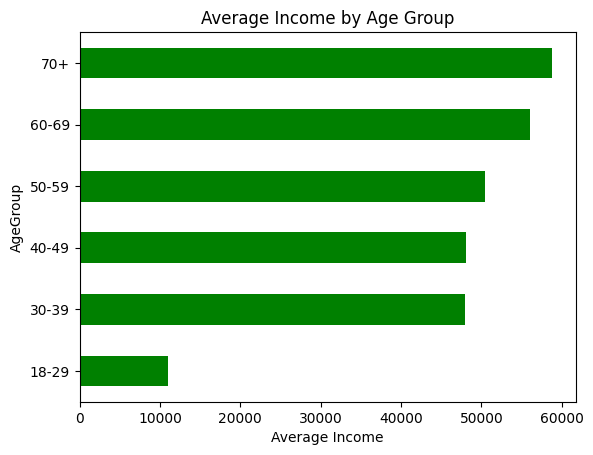

In [49]:
group3.plot(kind = "barh", color = "green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()


In [50]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,69,0,1529,4912,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,72,2,21,4362,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,61,0,734,4561,0,60-69
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,42,1,48,4388,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,45,1,407,4410,0,40-49


In [51]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='str')

In [52]:
feature = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Recency"]

In [53]:
X = df[feature].copy()

In [54]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,69,58138.0,1529,8,4,7,58
1,72,46344.0,21,1,2,5,38
2,61,71613.0,734,8,10,4,26
3,42,26646.0,48,2,4,6,26
4,45,58293.0,407,5,6,5,94
...,...,...,...,...,...,...,...
2235,59,61223.0,1094,9,4,5,46
2236,80,64014.0,436,8,5,7,56
2237,45,56981.0,1217,2,13,6,91
2238,70,69245.0,782,6,10,3,8


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_scaled = scaler.fit_transform(X)

In [57]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67383183, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.93944575, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.29614239, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.13315371, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.37932364, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7141632 , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss = []

In [60]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 


In [61]:
wcss

[10239.750859503842,
 9030.154600685077,
 8421.135359732203,
 7590.150138680372,
 7191.90659580914,
 6816.530631439959,
 6499.5157141179525,
 5890.137864808169]

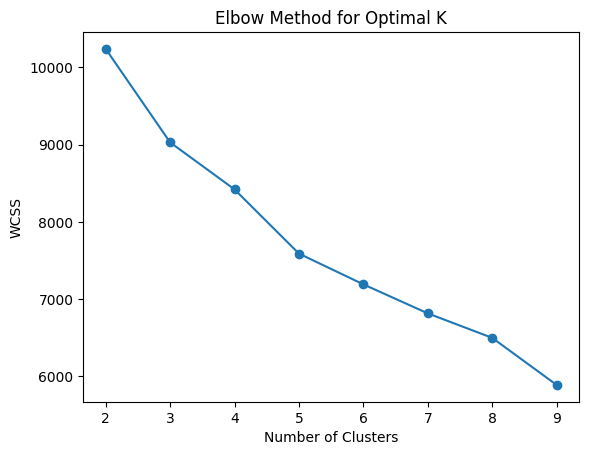

In [62]:
plt.plot(range(2, 10), wcss, marker = "o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [63]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [72]:
cluster_summary = df.groupby("Cluster")[feature].mean() 

In [73]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,51.817647,31800.617647,65.350980,1.841176,2.968627,6.613725,26.782353
1,62.360129,54055.649518,530.848875,6.093248,6.318328,6.302251,25.974277
2,70.918919,73813.756757,1104.885135,4.371622,8.226351,2.422297,54.060811
3,56.253906,36757.974609,114.396484,2.425781,3.474609,6.394531,76.277344
4,47.136508,79040.526984,1246.444444,4.555556,8.533333,2.568254,47.320635
5,59.731618,63174.875000,996.992647,8.264706,9.095588,6.080882,62.180147


In [74]:
df["Cluster"].value_counts()

Cluster
3    512
0    510
4    315
1    311
2    296
5    272
Name: count, dtype: int64

In [75]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_data[:,0], pca_data[:,1]


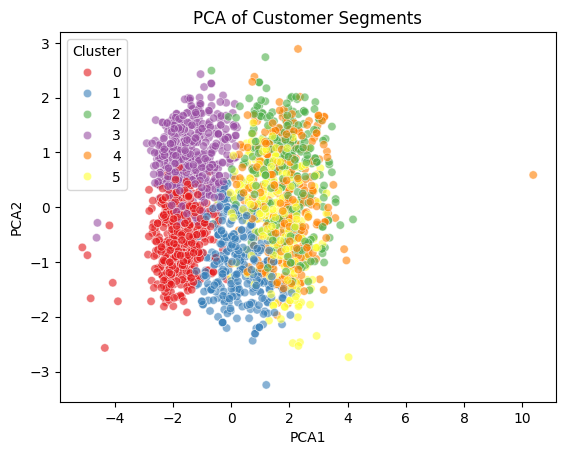

In [78]:
sns.scatterplot(x = "PCA1", y = "PCA2", data = df, hue = "Cluster", palette = "Set1", alpha = 0.6)
plt.title("PCA of Customer Segments")
plt.show()

In [79]:
cluster_summary 

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,51.817647,31800.617647,65.350980,1.841176,2.968627,6.613725,26.782353
1,62.360129,54055.649518,530.848875,6.093248,6.318328,6.302251,25.974277
2,70.918919,73813.756757,1104.885135,4.371622,8.226351,2.422297,54.060811
3,56.253906,36757.974609,114.396484,2.425781,3.474609,6.394531,76.277344
4,47.136508,79040.526984,1246.444444,4.555556,8.533333,2.568254,47.320635
5,59.731618,63174.875000,996.992647,8.264706,9.095588,6.080882,62.180147


In [ ]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']